In [79]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

In [80]:
# setting display format for float output
pd.options.display.float_format = '{:0.2f}'.format

### 1. Importing the data and merging

In [81]:
file_path = 'D:/Academics/Data Science/AnalytixLabs/Python/Case Studies/Python Foundation Case Study 3 - Insurance Claims Case Study/'
claims = pd.read_csv(file_path + 'claims.csv')
cust = pd.read_csv(file_path + 'cust_demographics.csv')

In [82]:
claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.00,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.00,No


In [83]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [84]:
cust.head(2)

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver


In [85]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [86]:
claims_cust = pd.merge( left = claims , right = cust , left_on='customer_id' , right_on='CUST_ID' , how = 'inner')
claims_cust.head(3)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.00,No,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.00,No,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.00,Yes,30308357,Female,11-Mar-84,TN,798-631-4758,Silver


In [87]:
claims_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1085 non-null   int64  
 1   customer_id          1085 non-null   int64  
 2   incident_cause       1085 non-null   object 
 3   claim_date           1085 non-null   object 
 4   claim_area           1085 non-null   object 
 5   police_report        1085 non-null   object 
 6   claim_type           1085 non-null   object 
 7   claim_amount         1020 non-null   object 
 8   total_policy_claims  1075 non-null   float64
 9   fraudulent           1085 non-null   object 
 10  CUST_ID              1085 non-null   int64  
 11  gender               1085 non-null   object 
 12  DateOfBirth          1085 non-null   object 
 13  State                1085 non-null   object 
 14  Contact              1085 non-null   object 
 15  Segment              1085 non-null   o

### 2. Perform a data audit for the datatypes

In [88]:
claims_cust.claim_date = pd.to_datetime( claims_cust.claim_date, format='%m/%d/%Y' )

In [89]:
claims_cust.DateOfBirth = pd.to_datetime( claims_cust.DateOfBirth, format='%d-%b-%y' )
claims_cust.DateOfBirth = pd.Series( np.where( claims_cust.DateOfBirth.dt.year >= 2022 ,
                                               claims_cust.DateOfBirth + pd.DateOffset(years=-100) ,
                                               claims_cust.DateOfBirth))

In [90]:
claims_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1085 non-null   int64         
 1   customer_id          1085 non-null   int64         
 2   incident_cause       1085 non-null   object        
 3   claim_date           1085 non-null   datetime64[ns]
 4   claim_area           1085 non-null   object        
 5   police_report        1085 non-null   object        
 6   claim_type           1085 non-null   object        
 7   claim_amount         1020 non-null   object        
 8   total_policy_claims  1075 non-null   float64       
 9   fraudulent           1085 non-null   object        
 10  CUST_ID              1085 non-null   int64         
 11  gender               1085 non-null   object        
 12  DateOfBirth          1085 non-null   datetime64[ns]
 13  State                1085 non-nul

### 3. Convert the column claim_amount to numeric

In [91]:
claims_cust.claim_amount = claims_cust.claim_amount.str.replace('$', '', regex=False).astype('float64')

### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [92]:
claims_cust.loc[(claims_cust.claim_type.str.contains(pat='injury', case=False)) &
                ((claims_cust.police_report == 'No') | (claims_cust.police_report == 'Unknown')) ,
               'alert_flag'] = 1
claims_cust.loc[((claims_cust.claim_type.str.contains(pat='injury', case=False)) &
                (claims_cust.police_report == 'Yes'))
              | (~claims_cust.claim_type.str.contains(pat='injury', case=False)) ,
               'alert_flag'] = 0

### 5. Retain the most recent observaton and delete any duplicated records in the data based on the customer ID column

In [93]:
claims_cust = claims_cust.sort_values('claim_date').drop_duplicates(subset = 'customer_id',
                                                                    keep = 'last')

### 6. Check for missing values and impute the missing values with an appropriate value

In [94]:
claims_cust.claim_amount = claims_cust.claim_amount.fillna(claims_cust.claim_amount.mean())
claims_cust.total_policy_claims = claims_cust.total_policy_claims.fillna(claims_cust.total_policy_claims.mode()[0])

### 7. Calculate the age of customers in years. Based on the age, categorize the customers.

In [95]:
claims_cust['age'] = (claims_cust.claim_date - claims_cust.DateOfBirth).dt.days / 365.25
cond_list = [claims_cust.age < 18 ,
             (claims_cust.age >= 18) & (claims_cust.age < 30) ,
             (claims_cust.age >= 30) & (claims_cust.age < 60) ,
             claims_cust.age >= 60]
choice_list = ['Children' , 'Youth' , 'Adult', 'Senior']
claims_cust['cust_cat'] = np.select(cond_list, choice_list)

### 8. What is the average amount claimed by the customers from various segments?

In [96]:
claims_cust.groupby('Segment').agg({'claim_amount':'mean'}).rename(columns={'claim_amount':'mean_claim_amount'})

,mean_claim_amount
Segment,
Gold,12846.40
Platinum,12371.65
Silver,12267.86


### 9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018

In [97]:
date_var = pd.to_datetime('2018-Oct-1', format='%Y-%b-%d')

claims_cust.loc[claims_cust.claim_date <= date_var + pd.DateOffset(days=-20) , : ] \
            .groupby('incident_cause').agg({'claim_amount':'sum'}) \
            .rename(columns={'claim_amount':'total_claim_amount'})

,total_claim_amount
incident_cause,
Crime,721938.63
Driver error,3315850.72
Natural causes,1312987.04
Other causes,3723151.80
Other driver error,3277536.45


### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [98]:
# filtering rows with claims by Adults for only Driver related causes
claims_cust_driver = claims_cust.loc[(claims_cust.cust_cat == 'Adult') &
                                     (claims_cust.incident_cause.str.contains(pat='driver', case=False)) , : ]

claims_cust_driver = claims_cust_driver.groupby('State').agg({'State':'count'}) \
                                       .rename(columns={'State':'total_driver_causes'})
claims_cust_driver.loc[claims_cust_driver.index.isin(['TX','DE','AK']) , :]

,total_driver_causes
State,
AK,8
DE,9
TX,6


### 11.  Draw a pie chart between the aggregated value of claim amount based on gender and segment.

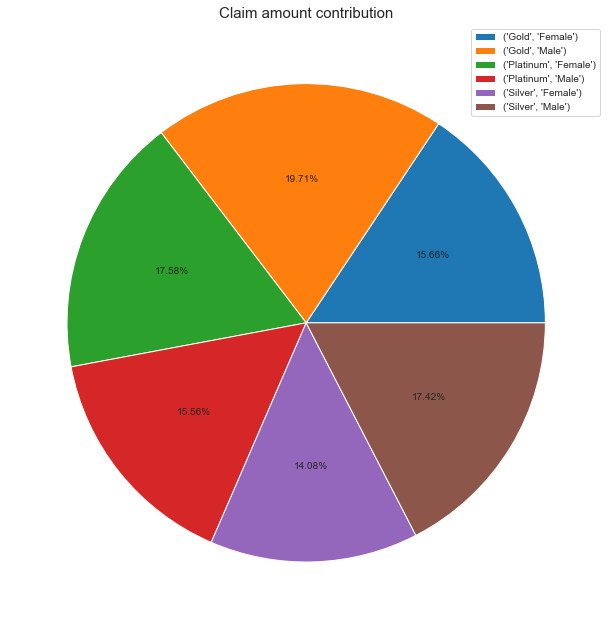

In [99]:
# manipulating data for plotting
claims_cust_pie = claims_cust.groupby(by=['Segment','gender']).agg({'claim_amount':'sum'})
# plotting the pie chart
plt.figure(figsize=(11,11))
plt.pie(x=claims_cust_pie.claim_amount, autopct= '%0.2f%%')
plt.legend(labels=claims_cust_pie.index)
plt.title('Claim amount contribution' , fontdict={'fontsize':15})
plt.show()

### 12.  Among males and females, which gender had claimed the most for any type of driver related issues?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5624\1389407098.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:,.2f}'.format(y) for y in y_val])


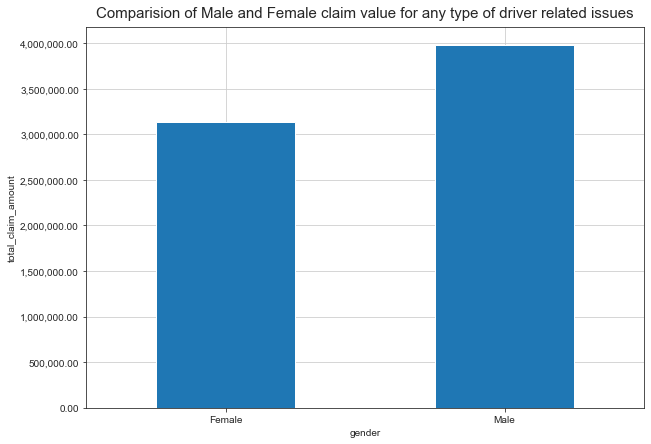

In [100]:
claims_cust_driver = claims_cust.loc[claims_cust.incident_cause.str.contains(pat='driver', case=False) , : ]
claims_cust_driver = claims_cust_driver.pivot_table(index='incident_cause', columns='gender',
                                                    values='claim_amount', aggfunc='sum')
claims_cust_driver.sum(axis=0).plot(kind='bar', rot=0, figsize=(10,7), grid=True)

# formatting y values to show numbers with thousand separator
y_val = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.2f}'.format(y) for y in y_val])

plt.ylabel('total_claim_amount')
plt.title('Comparision of Male and Female claim value for any type of driver related issues',
          pad=10, fontdict={'fontsize':15})
plt.show()

### 13.  Which age group had the maximum fraudulent policy claims?

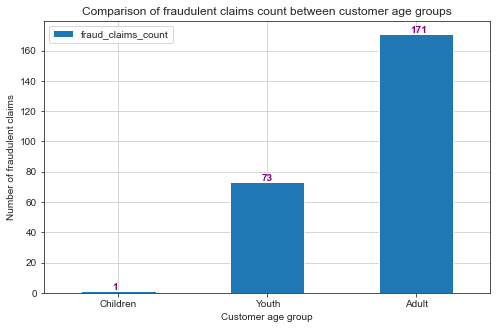

Customers in the "ADULT" age group have the most number of fraudulent claims


In [101]:
claims_cust_fraud = claims_cust.loc[claims_cust.fraudulent == 'Yes' , :].groupby('cust_cat') \
    .agg({'fraudulent':'count'}).rename(columns={'fraudulent':'fraud_claims_count'}) \
    .sort_values(by='fraud_claims_count') 

claims_cust_fraud.plot(kind='bar', y='fraud_claims_count', rot=0, figsize=(8,5))
# annotate bar plot
for x,y in enumerate(claims_cust_fraud.fraud_claims_count) :
    plt.text(x-.04, y+1, str(y), color='purple', size='medium', weight='bold')

plt.xlabel('Customer age group')
plt.ylabel('Number of fraudulent claims')
plt.title('Comparison of fraudulent claims count between customer age groups')
plt.show()

print('Customers in the "ADULT" age group have the most number of fraudulent claims')

### 14.  Visualize the monthly trend of the total amount that has been claimed by the customers.

In [102]:
# Manipulating data for plotting
claims_cust_trend = claims_cust.groupby(by=[claims_cust.claim_date.dt.year , claims_cust.claim_date.dt.month]) \
                                .agg({'claim_amount':'sum'})
claims_cust_trend.index.set_names(['claim_year','claim_month'], level=[0,1], inplace=True)
claims_cust_trend = claims_cust_trend.reset_index()
claims_cust_trend['monthly_claim_date'] = pd.to_datetime(dict(year = claims_cust_trend.claim_year,
                                                              month = claims_cust_trend.claim_month,
                                                              day = 1))

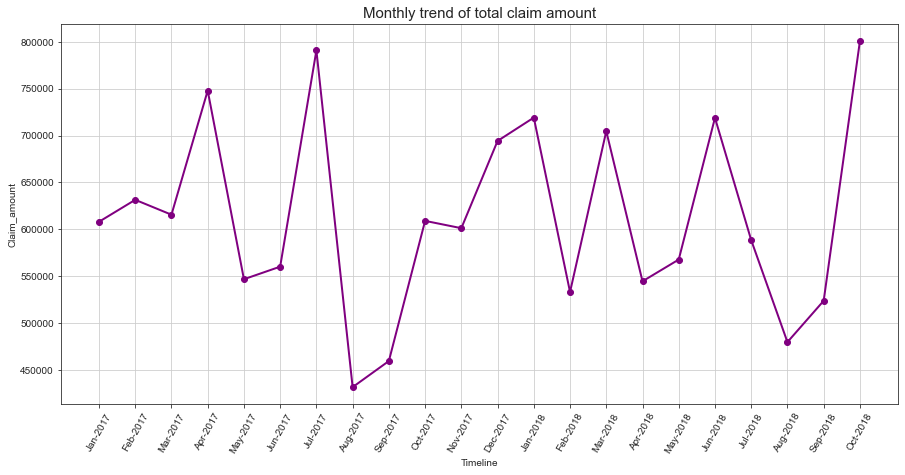

In [103]:
# Plotting
plt.figure(figsize=(15,7))
plt.plot(claims_cust_trend.monthly_claim_date.dt.strftime('%b-%Y'), claims_cust_trend.claim_amount,
         marker= 'o', linewidth=2, color='purple')
plt.xticks(rotation=60)
plt.xlabel('Timeline')
plt.ylabel('Claim_amount')
plt.title('Monthly trend of total claim amount', fontsize=15)
plt.show()

### 15. What is the average claim amount for gender and age categories

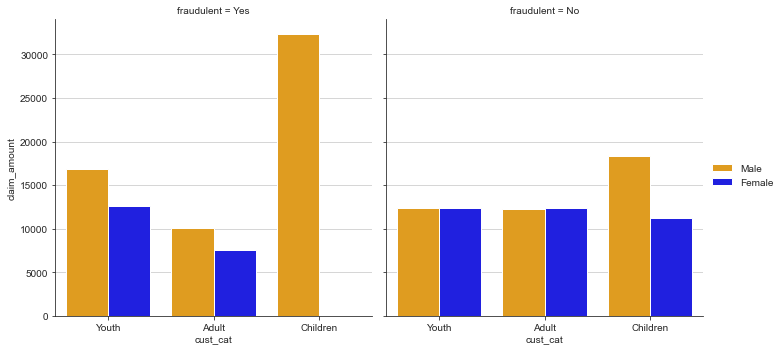

In [104]:
sns.set_style("ticks",{'axes.grid' : True})
g = sns.FacetGrid(claims_cust, col='fraudulent', height=5, aspect=1)
g.map_dataframe(sns.barplot, x='cust_cat', y='claim_amount', estimator=np.mean,
                hue='gender', hue_order=['Male','Female'], palette=['orange','blue'], ci=None)
g.add_legend()
plt.show()

### 16. Is there any similarity in the amount claimed by males and females?

In [105]:
# separating male and female claim amounts finding mean of the samples
claims_male = claims_cust.loc[claims_cust.gender == 'Male','claim_amount']
claims_female = claims_cust.loc[claims_cust.gender == 'Female','claim_amount']

print('Mean claim amount by Males & Females:')
print('Male : ', claims_male.mean(), ' | Female : ', claims_female.mean())

Mean claim amount by Males & Females:
Male :  12884.845110657638  | Female :  12101.160474551885


Since the two samples are independent from each other, `independent t-test` will help in concluding on the similarity of the two samples

**Ho :** Means of amount claimed by Male and Female are statistically similar <br>
**Ha :** Means of amount claimed by Male and Female are statistically different

In [106]:
print(stats.ttest_ind(claims_male, claims_female))

Ttest_indResult(statistic=0.9625093446632118, pvalue=0.33601006135365463)


Considering a CI of **95%**, as the p-value is greater than 0.05, we **fail to reject the Null Hypothesis**

**Business Conclusion:** <br>
The amount claimed by Male and Female are statistically similar.

### 17. Is there any relationship between age category and segment?

Since both are categorical variables, `chi square test` will help in concluding if there is any relationship between the variables

**Ho :** There is no association between age category and segment variables <br>
**Ha :** There is association between age category and segment variables

In [107]:
stats.chi2_contingency(pd.crosstab(index=claims_cust.Segment , columns=claims_cust.cust_cat))

(5.29543655253879,
 0.25830442857623553,
 4,
 array([[255.70779221,   2.75324675, 112.53896104],
        [248.81539889,   2.67903525, 109.50556586],
        [238.47680891,   2.567718  , 104.9554731 ]]))

Considering a CI of **95%**, as the p-value is greater than 0.05, we **fail to reject the Null Hypothesis**

**Business Conclusion:** <br>
There is no relationship/association between age category and segment variables

### 18. The current year has shown a signifcant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

The fiscal average for claim amount in year 2016-2017 is given as `$10000`. <br>
Since previous mean has to be compared with current sample, `one sample t-test` will help in concluding the hypothesis

**Ho :** The fiscal average claim amount for current year is **significantly less** than `$10,000`  <br>
**Ha :** The fiscal average claim amount for current year is **significantly greater** than `$10,000`

In [108]:
fiscal_avg = 10000
print(stats.ttest_1samp(claims_cust.claim_amount, popmean=fiscal_avg))

Ttest_1sampResult(statistic=6.146897188063232, pvalue=1.111087909732772e-09)


Considering a CI of **99%**, as the p-value is less than 0.01, we **can reject the Null Hypothesis**

**Business Conclusion:** <br>
The fiscal average claim amount for current year is **significantly greater** than `$10,000`

### 19. Is there any diference between age groups and insurance claims?

In [109]:
adult_claims = claims_cust.loc[claims_cust.cust_cat == 'Adult', 'claim_amount']
youth_claims = claims_cust.loc[claims_cust.cust_cat == 'Youth', 'claim_amount']
children_claims = claims_cust.loc[claims_cust.cust_cat == 'Children', 'claim_amount']

print('Mean claim amount:')
print('Adult : ', adult_claims.mean() , ' | Youth : ', youth_claims.mean(), ' | Children : ', children_claims.mean())

Mean claim amount:
Adult :  12836.305475653651  | Youth :  11599.630757341107  | Children :  18300.875


Since there are three independent samples, `f-test` will help in concluding the hypothesis

**Ho :** The mean of amount claimed by Adults, Youths & Children customers are similar <br>
**Ha :** The mean of amount claimed by Adults, Youths & Children customers are significantly different compared to Youth customers

In [110]:
print(stats.f_oneway(adult_claims, youth_claims, children_claims))

F_onewayResult(statistic=1.733755722252587, pvalue=0.17711331981256714)


Considering a CI of **95%**, as the p-value is greater than 0.05, we **fail to reject the Null Hypothesis**

**Business Conclusion:** <br>
The mean of amount claimed by Adults, Youths & Children customers are **statistically similar**

### 20. Is there any relationship between total number of policy claims and the claimed amount?

Spearman's rank correlation coefficient can be used to check for relationship between one continuous and one ordinal categorical variables

In [111]:
stats.spearmanr(claims_cust.claim_amount, claims_cust.total_policy_claims)

SpearmanrResult(correlation=0.0024438656269395224, pvalue=0.9361209394901033)

Since the absolute value of correlation coefficient between the two variables is < 0.5, there is **no relationship** between the two variables.

**Business Conclusion:** <br>
There is **no relationship** between total number of policy claims and the claimed amount.